In [1]:
"""
自定义层的实现——tf.keras.layer:
1.__init__:执行所有与输入无关的初始化
2.build: 获得输入张量的形状，进行其余初始化
3。call: 进行前向计算
"""
import os
import matplotlib.pyplot as plt
import tensorflow as tf

2023-03-31 08:17:11.556626: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 08:17:11.652254: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 08:17:11.653392: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 08:17:12.570298: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# 导入数据集
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

2194/2194 [==============================] - 0s 0us/step
Local copy of the dataset file: /home/zhuhou2/.keras/datasets/iris_training.csv


In [6]:
train_dataset_fp

'/home/zhuhou2/.keras/datasets/iris_training.csv'

In [7]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [8]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [10]:
# 创建dataset：返回{features, label}
batch_size=32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

2023-03-31 08:27:21.002519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-03-31 08:27:21.003774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [1]
	 [[{{node Placeholder/_10}}]]


OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.4, 7.6, 6.9, 6.8, 4.6, 7.3, 4.4, 6.3, 5.4, 5.1, 6.2, 5.5, 4.7,
       5.1, 5.9, 4.6, 6.9, 4.9, 5. , 6.4, 6.7, 6.5, 6.3, 5.8, 6.6, 5. ,
       5.2, 4.6, 6.1, 6.5, 6. , 6.4], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.1, 3. , 3.2, 3.2, 3.6, 2.9, 3.2, 2.5, 3.7, 3.8, 2.8, 3.5, 3.2,
       3.5, 3.2, 3.4, 3.1, 2.4, 3.2, 2.8, 3.1, 3.2, 3.4, 2.7, 3. , 3.5,
       3.4, 3.1, 2.8, 2.8, 2.7, 2.8], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.5, 6.6, 5.7, 5.9, 1. , 6.3, 1.3, 5. , 1.5, 1.6, 4.8, 1.3, 1.3,
       1.4, 4.8, 1.4, 5.1, 3.3, 1.2, 5.6, 5.6, 5.1, 5.6, 5.1, 4.4, 1.3,
       1.4, 1.5, 4. , 4.6, 5.1, 5.6], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.8, 2.1, 2.3, 2.3, 0.2, 1.8, 0.2, 1.9, 0.2, 0.2, 1.8, 0.2, 0.2,
       0.3, 1.8, 0.3, 2.3, 1. , 0.2, 2.1, 2.4, 2. , 2.4, 1.9,

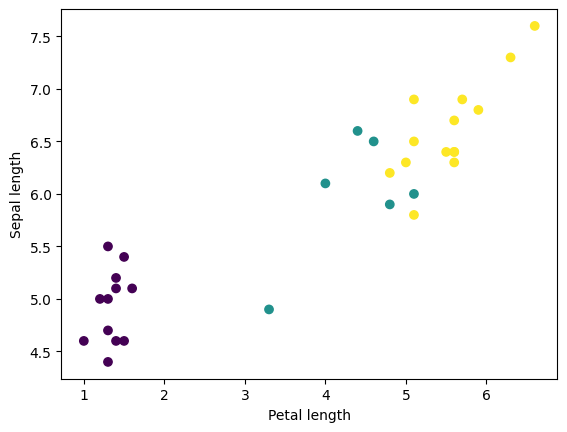

In [15]:
features, labels = next(iter(train_dataset))

print(features)
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [16]:
"""
要简化模型步骤，需要将特征字典重新打包为形状(batch_size, num_features)的数组
tf.stack
"""
# features原先是(num_features,batch_size)
def pack_feature_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

train_dataset = train_dataset.map(pack_feature_vector)

In [20]:
# 迭代器产生的结果是tf.tensor
features, labels = next(iter(train_dataset))
features[:5]

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[5.8, 2.7, 4.1, 1. ],
       [5.2, 2.7, 3.9, 1.4],
       [5.8, 2.7, 5.1, 1.9],
       [6.5, 3. , 5.8, 2.2],
       [6.1, 3. , 4.9, 1.8]], dtype=float32)>

In [23]:
# 创建模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])
predictions=model(features)
print("prediction:{}".format(tf.argmax(predictions, axis=1)))
print("    Labels:{}".format(labels))

prediction:[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
    Labels:[1 1 2 2 2 1 0 2 0 2 2 0 2 2 1 0 2 1 1 0 0 1 0 1 2 1 0 0 0 2 1 0]


In [26]:
# 定义损失函数
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def loss(model, x, y, training):
    y_= model(x,training=training)
    
    return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("loss test: {}".format(l))

loss test: 1.1119922399520874


In [31]:
# 使用tf.GradientTape来计算梯度以优化模型
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [32]:
# 创建优化器
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# 优化步骤
loss_value, grads = grad(model, features, labels)
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))


Step: 0, Initial Loss: 1.1119922399520874
Step: 1,         Loss: 1.1110022068023682


In [34]:
"""
训练模型:
1.遍历每个样本:x,y
2.计算模型损失和梯度
3.使用optimizer更新模型变量
4.跟踪可视化
"""
# keep_result for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    # Training loop - using batches of 32
    for x,y in train_dataset:
        # optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        # Track progress
        epoch_loss_avg.update_state(loss_value)    # Add current batch loss
        epoch_accuracy.update_state(y, model(x, training=True))
    
    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))


Epoch 000: Loss: 1.114, Accuracy: 30.000%
Epoch 050: Loss: 1.019, Accuracy: 35.833%
Epoch 100: Loss: 0.577, Accuracy: 70.000%
Epoch 150: Loss: 0.387, Accuracy: 85.833%
Epoch 200: Loss: 0.276, Accuracy: 95.000%


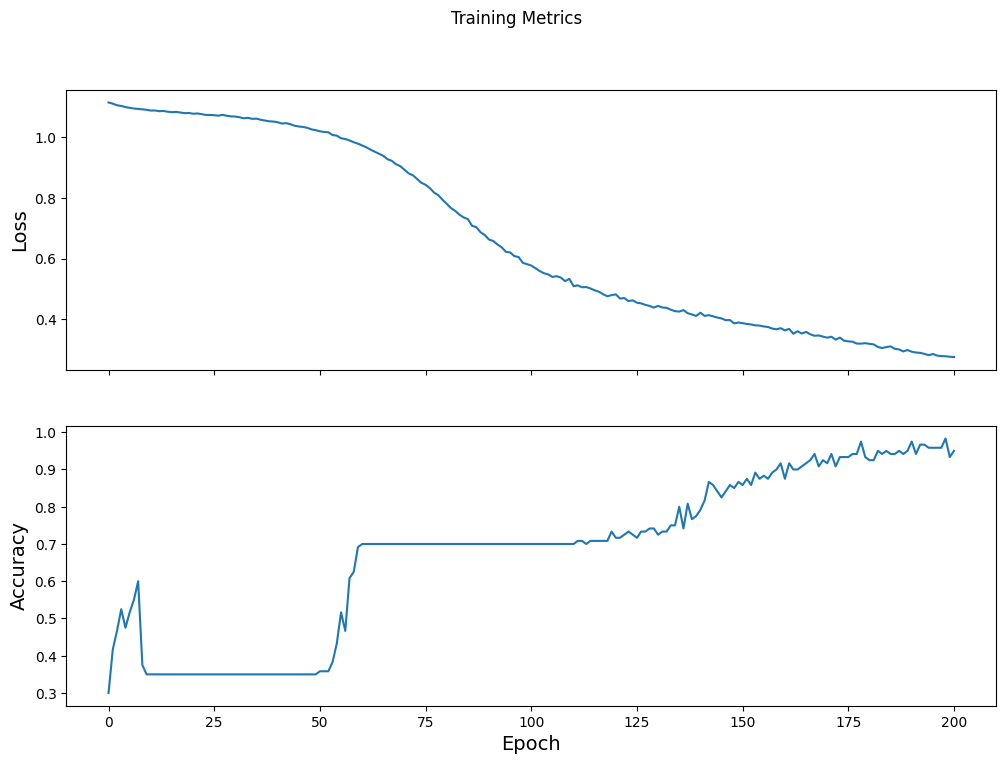

In [35]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [37]:
"""
测试数据
"""
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_feature_vector)
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


2023-03-31 09:00:04.260007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-03-31 09:00:04.260988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype float and shape [1]
	 [[{{node Placeholder/_5}}]]


In [39]:
"""
预测模型
"""
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (95.6%)
Example 1 prediction: Iris versicolor (66.2%)
Example 2 prediction: Iris virginica (65.0%)
